### Import libraries/files

In [21]:
import preprocess

In [22]:
import numpy as np
import random
import matplotlib.pyplot as plt

### Define files that belong to a class (their annotation)

In [23]:
annotations_for_files = {
    0: [
        '../../data/human_activity_recognition/indoors/lab/lab_empty_1685504223.572277.txt',
        '../../data/human_activity_recognition/indoors/corridor/corridor_empty_1685749485.6155138.txt', 
        '../../data/human_activity_recognition/outdoors/parking/parking_empty_1685740580.4567273.txt',
        '../../data/human_activity_recognition/outdoors/yard/yard_empty_1685811638.363745.txt'
    ],
    1: [
        '../../data/human_activity_recognition/indoors/lab/lab_standing_1685504666.5088024.txt', 
        '../../data/human_activity_recognition/indoors/corridor/corridor_standing_1685750223.3215554.txt', 
        '../../data/human_activity_recognition/outdoors/parking/parking_standing_1685741178.8062696.txt',
        '../../data/human_activity_recognition/outdoors/yard/yard_standing_1685812050.3238325.txt'
    ],
    2: [
        '../../data/human_activity_recognition/indoors/lab/lab_sitting_1685505160.02395.txt', 
        '../../data/human_activity_recognition/indoors/corridor/corridor_sitting_1685751375.4694774.txt', 
        '../../data/human_activity_recognition/outdoors/parking/parking_sitting_1685741578.0545967.txt',
        '../../data/human_activity_recognition/outdoors/yard/yard_sitting_1685812434.4243166.txt'
    ],
    3: [
        '../../data/human_activity_recognition/indoors/lab/lab_sittingupdown_1685506366.902033.txt', 
        '../../data/human_activity_recognition/indoors/corridor/corridor_sittingupdown_1685751017.898958.txt', 
        '../../data/human_activity_recognition/outdoors/parking/parking_sittingupdown_1685741945.5226183.txt',
        '../../data/human_activity_recognition/outdoors/yard/yard_sittingupdown_1685812837.0718572.txt'
    ],
    4: [
        '../../data/human_activity_recognition/indoors/lab/lab_jumping_1685508067.7758608.txt', 
        '../../data/human_activity_recognition/indoors/corridor/corridor_jumping_1685751761.0926085.txt', 
        '../../data/human_activity_recognition/outdoors/parking/parking_jumping_1685743199.2157178.txt',
        '../../data/human_activity_recognition/outdoors/yard/yard_jumping_1685813587.8496902.txt'
    ],
    5: [
        '../../data/human_activity_recognition/indoors/lab/lab_walking_1685507226.876064.txt', 
        '../../data/human_activity_recognition/indoors/corridor/corridor_walking_1685750603.6436868.txt', 
        '../../data/human_activity_recognition/outdoors/parking/parking_walking_1685742761.396288.txt',
        '../../data/human_activity_recognition/outdoors/yard/yard_walking_1685813182.335254.txt'
    ]
}

### Preprocess CSI log files to spectograms

In [24]:
X, Y = preprocess.get_annotated_csi_segments_from_esp_logs(annotations_for_files, 100, False)

Annotated file: ../../data/human_activity_recognition/indoors/lab/lab_empty_1685504223.572277.txt
Annotated file: ../../data/human_activity_recognition/indoors/corridor/corridor_empty_1685749485.6155138.txt
Annotated file: ../../data/human_activity_recognition/outdoors/parking/parking_empty_1685740580.4567273.txt
Annotated file: ../../data/human_activity_recognition/outdoors/yard/yard_empty_1685811638.363745.txt
Annotated all files for annotation: 0
Annotated file: ../../data/human_activity_recognition/indoors/lab/lab_standing_1685504666.5088024.txt
Annotated file: ../../data/human_activity_recognition/indoors/corridor/corridor_standing_1685750223.3215554.txt
Annotated file: ../../data/human_activity_recognition/outdoors/parking/parking_standing_1685741178.8062696.txt
Annotated file: ../../data/human_activity_recognition/outdoors/yard/yard_standing_1685812050.3238325.txt
Annotated all files for annotation: 1
Annotated file: ../../data/human_activity_recognition/indoors/lab/lab_sitting_

In [25]:
X = preprocess.get_amplitudes(X)
print("Shape of X:", X.shape)

Shape of X: (9405, 100, 50)


### Defining annotation labels

In [26]:
annotations = np.unique(Y)
annotation_labels = {
    0: 'Empty',
    1: 'Standing',
    2: 'Sitting',
    3: 'Sitting Up and Down',
    4: 'Jumping',
    5: 'Walking'
}

### Plotting spectograms for each class

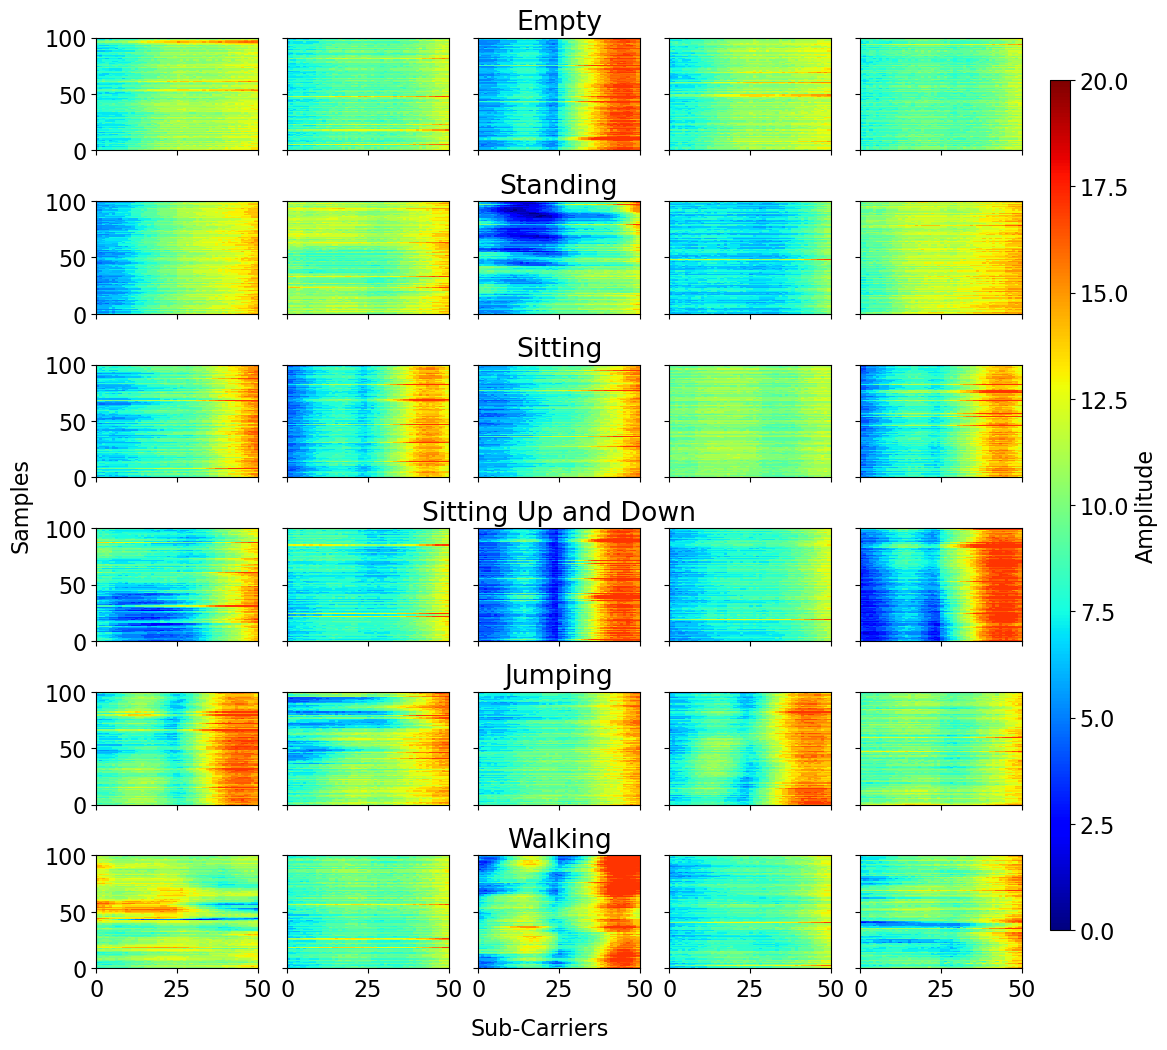

In [27]:
plt.rcParams.update({
    'font.size': 16, 
    'figure.figsize':(10, 10), 
    'font.family':['sans-serif'],
    'font.sans-serif':['DejaVu Sans'],
    'mathtext.default':'regular'
})

representative_set_size = 5  # Number of spectograms we want to display for each class
fig, axes = plt.subplots(len(annotations), representative_set_size, sharex=True, sharey=True, constrained_layout=True)
fig.text(0.5, -0.03, 'Sub-Carriers', ha='center')
fig.text(-0.03, 0.5, 'Samples', va='center', rotation='vertical')

for annotation in annotations:
    annotation_idxes = np.where(Y == annotation)  # Find spectograms of a particular class
    annotation_representative_set_idxes = random.sample(annotation_idxes[0].tolist(), representative_set_size) # Choose some samples of that class
    for col_idx, representative_data_idx in enumerate(annotation_representative_set_idxes):
        spectogram = axes[annotation][col_idx].pcolor(X[representative_data_idx], cmap='jet', vmin=0, vmax=20)
        if col_idx == representative_set_size//2:
            axes[annotation][col_idx].set_title(annotation_labels[annotation])  # Label class of the middle spectogram for each class

# For color bar of the histogram
cax = fig.add_axes([1.01, 0.075, 0.02, 0.85]) 
cbar = plt.colorbar(spectogram, cax=cax, orientation='vertical')
cbar.set_label('Amplitude')

plt.show()